In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir("C:\\Users\\USX28939\\Downloads\\")

https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/

In [3]:
from pandas.plotting import lag_plot, autocorrelation_plot

In [33]:
series = pd.read_csv("daily_temp.csv")

In [34]:
len(series)

3650

In [35]:
series.head()

,Date,Temp
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8


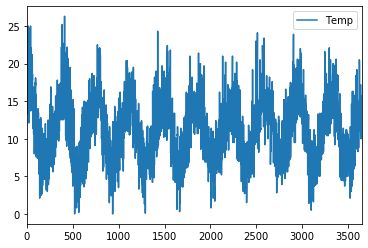

In [36]:
series.plot()

### <b>This lag_plot and autocorrelation_plot from pandas.plotting only works for a series data </b>

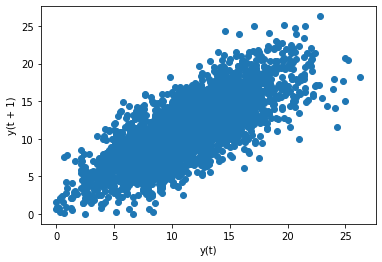

In [42]:
lag_plot(series["Temp"],lag=1)

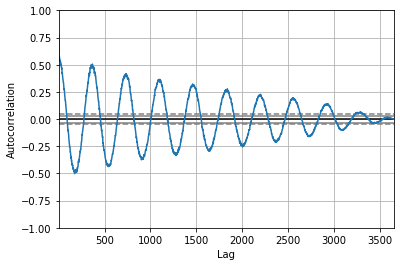

In [45]:
autocorrelation_plot(series["Temp"])

In [10]:
from statsmodels.graphics.tsaplots import plot_acf

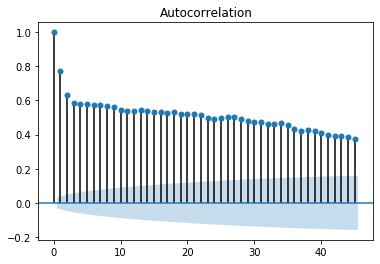

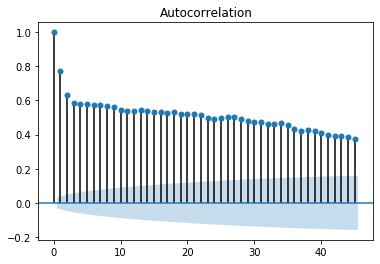

In [27]:
plot_acf(series, lags=45)

In [19]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [13]:
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]

In [15]:
model = AR(train)
model_fit = model.fit()

Lag: 29
Coefficients: [ 5.57543506e-01  5.88595221e-01 -9.08257090e-02  4.82615092e-02
  4.00650265e-02  3.93020055e-02  2.59463738e-02  4.46675960e-02
  1.27681498e-02  3.74362239e-02 -8.11700276e-04  4.79081949e-03
  1.84731397e-02  2.68908418e-02  5.75906178e-04  2.48096415e-02
  7.40316579e-03  9.91622149e-03  3.41599123e-02 -9.11961877e-03
  2.42127561e-02  1.87870751e-02  1.21841870e-02 -1.85534575e-02
 -1.77162867e-03  1.67319894e-02  1.97615668e-02  9.83245087e-03
  6.22710723e-03 -1.37732255e-03]
predicted=11.871275, expected=12.900000
predicted=13.053794, expected=14.600000
predicted=13.532591, expected=14.000000
predicted=13.243126, expected=13.600000
predicted=13.091438, expected=13.500000
predicted=13.146989, expected=15.700000
predicted=13.176153, expected=13.000000
Test MSE: 1.502


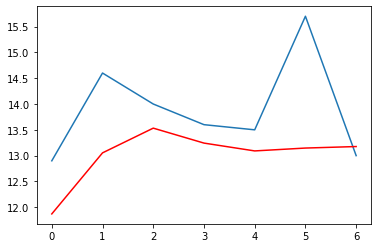

In [21]:
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')

In [68]:
series.head()

,Date,Temp,ddate,month,year
0,1/1/1981,20.7,1981-01-01,1,1981
1,1/2/1981,17.9,1981-01-02,1,1981
2,1/3/1981,18.8,1981-01-03,1,1981
3,1/4/1981,14.6,1981-01-04,1,1981
4,1/5/1981,15.8,1981-01-05,1,1981


In [67]:
series["year"] = series.ddate.dt.year

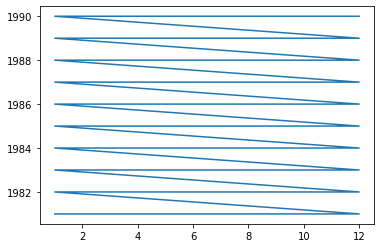

In [69]:
plt.plot(series["month"],series["year"])

In [29]:
from statsmodels.tsa.ar_model import AR
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = AR(data)
model_fit = model.fit(maxlag=20, ic='aic')
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[100.4109296]


In [11]:
from statsmodels.tsa.stattools import acf, lagmat

In [10]:
acf(data,nlags = 10, alpha = .95)

(array([1.        , 0.96921105, 0.9386192 , 0.908337  , 0.87763705,
        0.84733623, 0.81722792, 0.78751181, 0.75773069, 0.72823374,
        0.69885751]), array([[1.        , 1.        ],
        [0.96290878, 0.97551332],
        [0.92792623, 0.94931216],
        [0.89476039, 0.9219136 ],
        [0.8618299 , 0.89344419],
        [0.82969956, 0.8649729 ],
        [0.79804235, 0.8364135 ],
        [0.76699013, 0.80803349],
        [0.73604189, 0.77941949],
        [0.70551781, 0.75094967],
        [0.6752325 , 0.72248252]]))

In [39]:
a =lagmat(data,2)

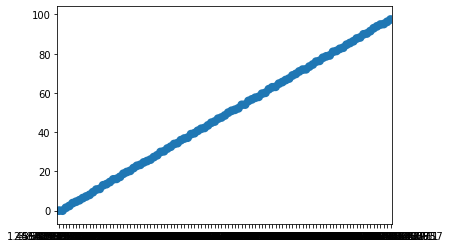

In [45]:
sns.pointplot(a[:,0],a[:,1])